### Notebook that analyzes the Stability Change of mutations with degFi scores. 
Several plots are generated
-- Plot of linear regression of value of score vs. value of Stability Change
-- Plot of distribution of all the scores 
-- Boxplots comparising the distributions of two groups (low vs. high): one using the mean other using 0.4 as cutoff
-- Boxplots in three groups

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Paths

In [2]:
base="../../../"
# Path mutations
path_output_missense_degrons = os.path.join(base,"data","missense_clean_type_rppa.tsv.gz")
# Scores
path_output_raw = os.path.join(base,"data","deg_scores_raw.tsv.gz")
path_output_plots = os.path.join(base,"plots","Figure5")

In [3]:
df_diff_info_missense_tcga = pd.read_csv(path_output_missense_degrons,sep="\t",compression="gzip")

In [4]:
df_missense_tcga = df_diff_info_missense_tcga[(~df_diff_info_missense_tcga["Altered_E3_Ligases"])&(df_diff_info_missense_tcga["Phenotype"]=="Missense_Mutation")&(~((df_diff_info_missense_tcga["Disrupt_Epitope"])&(df_diff_info_missense_tcga["Stability_Change"]<0)))&(np.isfinite(df_diff_info_missense_tcga["Stability_Change"]))][["Hugo_Symbol","CNA","protein_mutation","Phenotype","ABS_Stability_Change","Stability_Change","Type_Missense","Annotated","Prob_DEGRON","Protein","DEGRON","Matchable_Sample_ID","Class","PPI","CCDS","Entry_Isoform"]]
df_missense_tcga=df_missense_tcga[(df_missense_tcga["CNA"]<=1)&(df_missense_tcga["CNA"]>=-1)&(df_missense_tcga["Prob_DEGRON"]>=0.5)]  

In [5]:
df_missense_tcga.shape

(383, 16)

### Load scores

In [6]:
df_scores = pd.read_csv(path_output_raw,sep="\t",compression="gzip")

### Load

In [8]:
x=pd.merge(df_scores[["MUTATION","Entry_Isoform","SCORE"]].drop_duplicates(),df_missense_tcga,left_on=["MUTATION","Entry_Isoform"],right_on=["protein_mutation","Entry_Isoform"])

### using 0.5 as threshold

high    183
low     150
Name: group, dtype: int64


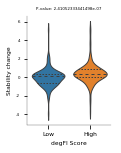

In [15]:
fig,ax = plt.subplots(figsize=(1.5,2))
threshold=0.5
order = ["low","high"]
x["group"] = x.apply(lambda row: "low" if row["SCORE"]< threshold else "high",axis=1)
sns.violinplot(data=x,y="Stability_Change",x="group",ax=ax,order=order,linewidth=1,inner="quartile")
odd,pvalue=stats.mannwhitneyu(x[x["SCORE"]>threshold]["Stability_Change"].values,x[x["SCORE"]<=threshold]["Stability_Change"].values,alternative="greater")
ax.set_xticklabels(["Low","High"],fontsize=6)
ax.set_xlabel("degFI Score",fontsize=6)
ax.set_ylabel("Stability change",fontsize=6)
ax.set_yticks([i for i in range(-4,8,2)])
ax.set_yticklabels([i for i in range(-4,8,2)],fontsize=4)
ax.set_title("P-value: "+str(pvalue).format({"0:.2E"}),fontsize=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
print (x["group"].value_counts())
plt.savefig(path_output_plots+'/comparison_groups_threshold.pdf', dpi=800,bbox_inches="tight")

#### using the mean as threshold

high    234
low      99
Name: group, dtype: int64


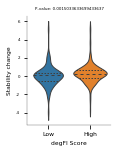

In [14]:
fig,ax = plt.subplots(figsize=(1.5,2))
threshold = np.nanmean(df_scores["SCORE"].values)
order = ["low","high"]
x["group"] = x.apply(lambda row: "low" if row["SCORE"]< threshold else "high",axis=1)
sns.violinplot(data=x,y="Stability_Change",x="group",ax=ax,order=order,linewidth=1,inner="quartile")
odd,pvalue=stats.mannwhitneyu(x[x["SCORE"]>threshold]["Stability_Change"].values,x[x["SCORE"]<=threshold]["Stability_Change"].values,alternative="greater")
ax.set_xticklabels(["Low","High"],fontsize=6)
ax.set_xlabel("degFI Score",fontsize=6)
ax.set_ylabel("Stability change",fontsize=6)
ax.set_yticks([i for i in range(-4,8,2)])
ax.set_yticklabels([i for i in range(-4,8,2)],fontsize=4)
ax.set_title("P-value: "+str(pvalue).format({"0:.2E"}),fontsize=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
print (x["group"].value_counts())
plt.savefig(path_output_plots+'/comparison_groups_mean.pdf', dpi=800,bbox_inches="tight")

### median

high    281
low      52
Name: group, dtype: int64


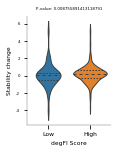

In [13]:
fig,ax = plt.subplots(figsize=(1.5,2))
threshold = np.nanmedian(df_scores["SCORE"].values)
order = ["low","high"]
x["group"] = x.apply(lambda row: "low" if row["SCORE"]< threshold else "high",axis=1)
sns.violinplot(data=x,y="Stability_Change",x="group",ax=ax,order=order,linewidth=1,inner="quartile")
odd,pvalue=stats.mannwhitneyu(x[x["SCORE"]>threshold]["Stability_Change"].values,x[x["SCORE"]<=threshold]["Stability_Change"].values,alternative="greater")
ax.set_xticklabels(["Low","High"],fontsize=6)
ax.set_xlabel("degFI Score",fontsize=6)
ax.set_ylabel("Stability change",fontsize=6)
ax.set_yticks([i for i in range(-4,8,2)])
ax.set_yticklabels([i for i in range(-4,8,2)],fontsize=4)
ax.set_title("P-value: "+str(pvalue).format({"0:.2E"}),fontsize=4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
print (x["group"].value_counts())
plt.savefig(path_output_plots+'/comparison_groups_median.pdf', dpi=800,bbox_inches="tight")